In [34]:
import torch
from utils import BNN
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import time

In [36]:
class FNN(nn.Module):
    """ Definition d'un FNN
    """

    def __init__(self, ns, theta=None):
        """ Initialisation
        Construction d'une instance de la class FNN 
        à partir des paramètres données

        Parameters
        ----------
        ns : list 
            une liste de nombres de couches
        theta : torch.Tensor (None)
            une tenseur de paramètres

        Returns
        -------
        FNN
            L'instance de la classe
        """
        super(FNN, self).__init__()
        self.funclist = []
        self.nbLayers = len(ns)
        self.ns = ns
        for i in range(self.nbLayers-1):
            self.funclist.append(nn.Linear(ns[i], ns[i+1]))
        if (theta != None):
            self.update_weights(theta)

    def forward(self, x):
        """ Evaluation
        Cette fonction fait une forward pass du FNN

        Parameters
        ----------
        x : torch.Tensor
            la valeur d'entré
        Returns
        -------
        torch.Tensor
            Le résultat du forward pass
        """
        for i in range(self.nbLayers - 2):
            x = self.funclist[i](x)
            x = torch.tanh(x)
            # x = torch.relu(x)
        x = self.funclist[self.nbLayers - 2](x)
        return x

    def update_weights(self, thetas):
        """ Mets à jour les paramètres (poids)
        Remplace les poids courants

        Parameters
        ----------
        thetas : torch.Tensor
                liste qui contient les tenseurs

        Returns
        -------
        """
        param_list = BNN.segment(thetas, self.ns)
        with torch.no_grad():
            for i in range(self.nbLayers - 1):
                self.funclist[i].weight = nn.Parameter(param_list[i*2])
                self.funclist[i].bias = nn.Parameter(param_list[i*2 + 1])

        return self
    
    def getTheta(self):
        """ renvoie les poids

        Parameters
        ----------

        Returns
        -------
        torch.Tensor
            Le gros tenseur de poids
        """
        param_list = []
        for i in range(self.nbLayers - 1):
            param_list.append(self.funclist[i].weight)
            param_list.append(self.funclist[i].bias)

        return BNN.wrap(param_list)

In [39]:
ns = [1,2,1]
modelsize = BNN.modelSize(ns)
oneTheta = torch.randn((modelsize,1))

In [42]:
myFNN = FNN(ns, oneTheta)

In [43]:
startI = -1
endI = 1
nbPoints = 100
myXs = torch.linspace(startI, endI, nbPoints).reshape((nbPoints, 1)) 

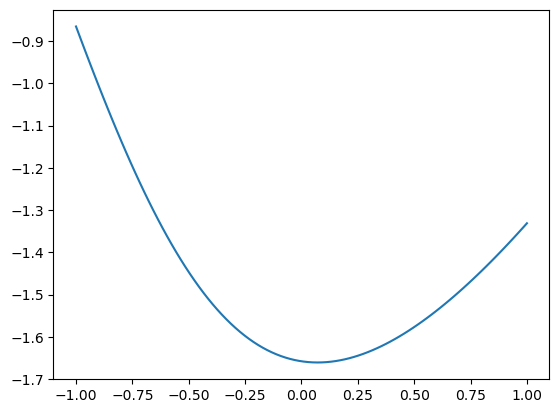

In [49]:
myYs = myFNN.forward(myXs)
plt.figure()
plt.plot(myXs.detach().numpy(), myYs.detach().numpy())
plt.show()

In [55]:
nbTheta = 10
thetas = torch.randn(modelsize, nbTheta)
anotherTheta = torch.randn((modelsize,1))
newYss = [myFNN.update_weights(thetas[:,i]).forward(myXs) for i in range(nbTheta)]

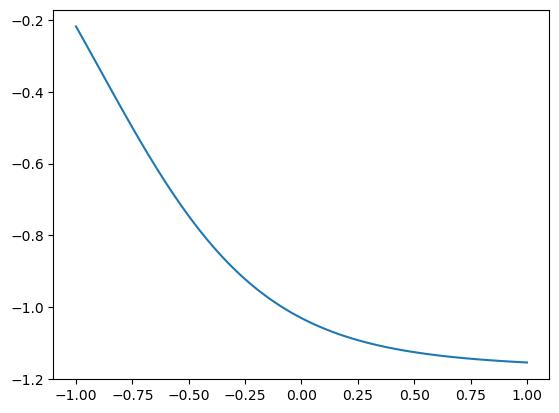

In [61]:
plt.figure()
plt.plot(myXs.detach().numpy(), newYss[9].detach().numpy())
plt.show()